In [1]:
import pandas as pd
import numpy as np

# Define the file path
file_path = r'C:\Users\inupa\Desktop\practice ML\G-Safe-Edge-Ai\ml-model\labeled_driving_data_cleaned.csv'

# Read the CSV file
df = pd.read_csv(file_path)

In [3]:
df

,g_force,accel_change,road_type,gyro_z_abs,label
0,0.166057,0.486524,Normal,0.237526,Safe
1,0.260036,0.468243,Normal,0.218137,Safe
2,0.297294,0.450737,Rough,0.217206,Safe
3,0.192085,0.830517,Normal,0.390643,Safe
4,0.324003,0.936045,Rough,1.337039,Dangerous
...,...,...,...,...,...
2953,0.275098,0.919515,Rough,0.521379,Dangerous
2954,0.434064,0.652211,Rough,0.348246,Safe
2955,0.352228,0.501316,Rough,0.438643,Safe
2956,0.458944,0.580991,Rough,0.793822,Dangerous


In [5]:
from sklearn.preprocessing import LabelEncoder

# Create label encoders
road_type_encoder = LabelEncoder()
label_encoder = LabelEncoder()

# Encode 'road_type' and 'label'
df['road_type_encoded'] = road_type_encoder.fit_transform(df['road_type'])
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# Preview the encoded dataset
df[['road_type', 'road_type_encoded', 'label', 'label_encoded']].head()

,road_type,road_type_encoded,label,label_encoded
0,Normal,0,Safe,1
1,Normal,0,Safe,1
2,Rough,1,Safe,1
3,Normal,0,Safe,1
4,Rough,1,Dangerous,0


In [7]:
df

,g_force,accel_change,road_type,gyro_z_abs,label,road_type_encoded,label_encoded
0,0.166057,0.486524,Normal,0.237526,Safe,0,1
1,0.260036,0.468243,Normal,0.218137,Safe,0,1
2,0.297294,0.450737,Rough,0.217206,Safe,1,1
3,0.192085,0.830517,Normal,0.390643,Safe,0,1
4,0.324003,0.936045,Rough,1.337039,Dangerous,1,0
...,...,...,...,...,...,...,...
2953,0.275098,0.919515,Rough,0.521379,Dangerous,1,0
2954,0.434064,0.652211,Rough,0.348246,Safe,1,1
2955,0.352228,0.501316,Rough,0.438643,Safe,1,1
2956,0.458944,0.580991,Rough,0.793822,Dangerous,1,0


In [9]:
columns_to_drop = ['label', 'road_type'] 

In [11]:
df = df.drop(columns=columns_to_drop)

In [13]:
df

,g_force,accel_change,gyro_z_abs,road_type_encoded,label_encoded
0,0.166057,0.486524,0.237526,0,1
1,0.260036,0.468243,0.218137,0,1
2,0.297294,0.450737,0.217206,1,1
3,0.192085,0.830517,0.390643,0,1
4,0.324003,0.936045,1.337039,1,0
...,...,...,...,...,...
2953,0.275098,0.919515,0.521379,1,0
2954,0.434064,0.652211,0.348246,1,1
2955,0.352228,0.501316,0.438643,1,1
2956,0.458944,0.580991,0.793822,1,0


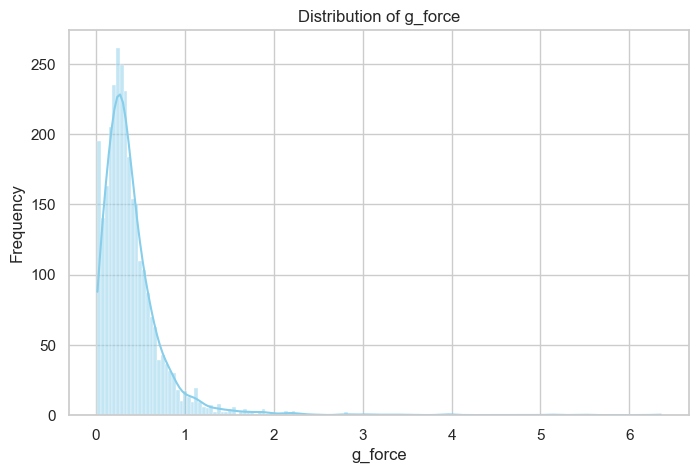

count    2958.000000
mean        0.401884
std         0.381774
min         0.019131
25%         0.195097
50%         0.318461
75%         0.497942
max         6.355678
Name: g_force, dtype: float64

Skewness: 5.03
Kurtosis: 49.71

Shapiro-Wilk Test:
Statistic=0.6677, p-value=0.0000


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

feature = 'g_force' 

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(df[feature], kde=True, color='skyblue')
plt.title(f'Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Summary statistics
print(df[feature].describe())

# Skewness and Kurtosis
skewness = df[feature].skew()
kurtosis = df[feature].kurt()

print(f"\nSkewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

# Shapiro-Wilk Test (small samples)
shapiro_result = stats.shapiro(df[feature].dropna())
print("\nShapiro-Wilk Test:")
print(f"Statistic={shapiro_result.statistic:.4f}, p-value={shapiro_result.pvalue:.4f}")


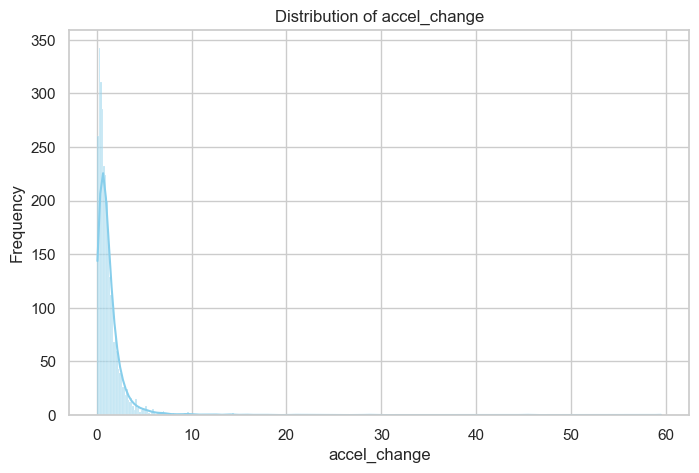

count    2958.000000
mean        1.338005
std         2.139630
min         0.084799
25%         0.449696
50%         0.881512
75%         1.547642
max        59.465035
Name: accel_change, dtype: float64

Skewness: 12.48
Kurtosis: 263.88

Shapiro-Wilk Test:
Statistic=0.3938, p-value=0.0000


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

feature = 'accel_change'

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(df[feature], kde=True, color='skyblue')
plt.title(f'Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Summary statistics
print(df[feature].describe())

# Skewness and Kurtosis
skewness = df[feature].skew()
kurtosis = df[feature].kurt()

print(f"\nSkewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

# Shapiro-Wilk Test (small samples)
shapiro_result = stats.shapiro(df[feature].dropna())
print("\nShapiro-Wilk Test:")
print(f"Statistic={shapiro_result.statistic:.4f}, p-value={shapiro_result.pvalue:.4f}")


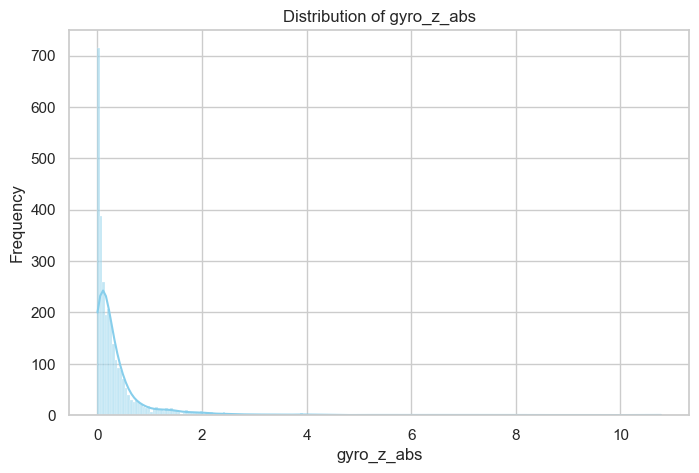

count    2958.000000
mean        0.368760
std         0.665093
min         0.000087
25%         0.050778
50%         0.171590
75%         0.395360
max        10.777971
Name: gyro_z_abs, dtype: float64

Skewness: 5.79
Kurtosis: 54.02

Shapiro-Wilk Test:
Statistic=0.5023, p-value=0.0000


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

feature = 'gyro_z_abs'

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(df[feature], kde=True, color='skyblue')
plt.title(f'Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Summary statistics
print(df[feature].describe())

# Skewness and Kurtosis
skewness = df[feature].skew()
kurtosis = df[feature].kurt()

print(f"\nSkewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

# Shapiro-Wilk Test small samples
shapiro_result = stats.shapiro(df[feature].dropna())
print("\nShapiro-Wilk Test:")
print(f"Statistic={shapiro_result.statistic:.4f}, p-value={shapiro_result.pvalue:.4f}")


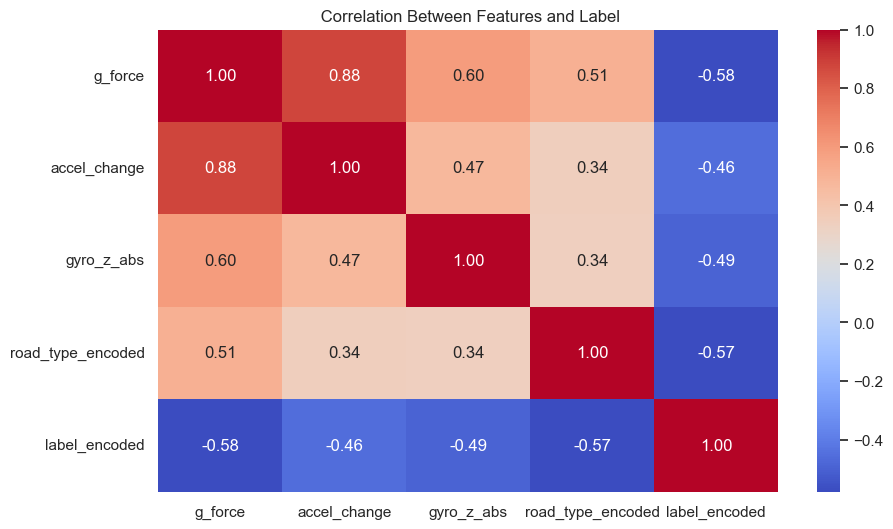

In [58]:
from scipy import stats

# Set style
sns.set(style="whitegrid")

# 1. 🔗 Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df[['g_force', 'accel_change', 'gyro_z_abs', 'road_type_encoded', 'label_encoded']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(" Correlation Between Features and Label")
plt.show()

C:\Users\inupa\AppData\Local\Temp\ipykernel_8672\1600717224.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label_encoded', palette='Set1')


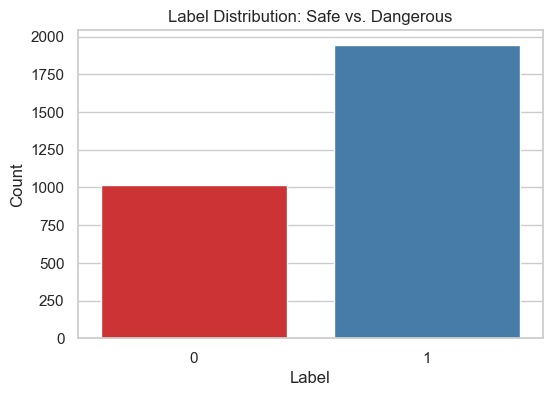

In [67]:
# 2. ⚖️ Label Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label_encoded', palette='Set1')
plt.title("Label Distribution: Safe vs. Dangerous")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

C:\Users\inupa\AppData\Local\Temp\ipykernel_8672\1079924504.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label_encoded', y=feature, palette='Set3')
C:\Users\inupa\AppData\Local\Temp\ipykernel_8672\1079924504.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label_encoded', y=feature, palette='Set3')
C:\Users\inupa\AppData\Local\Temp\ipykernel_8672\1079924504.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label_encoded', y=feature, palette='Set3')


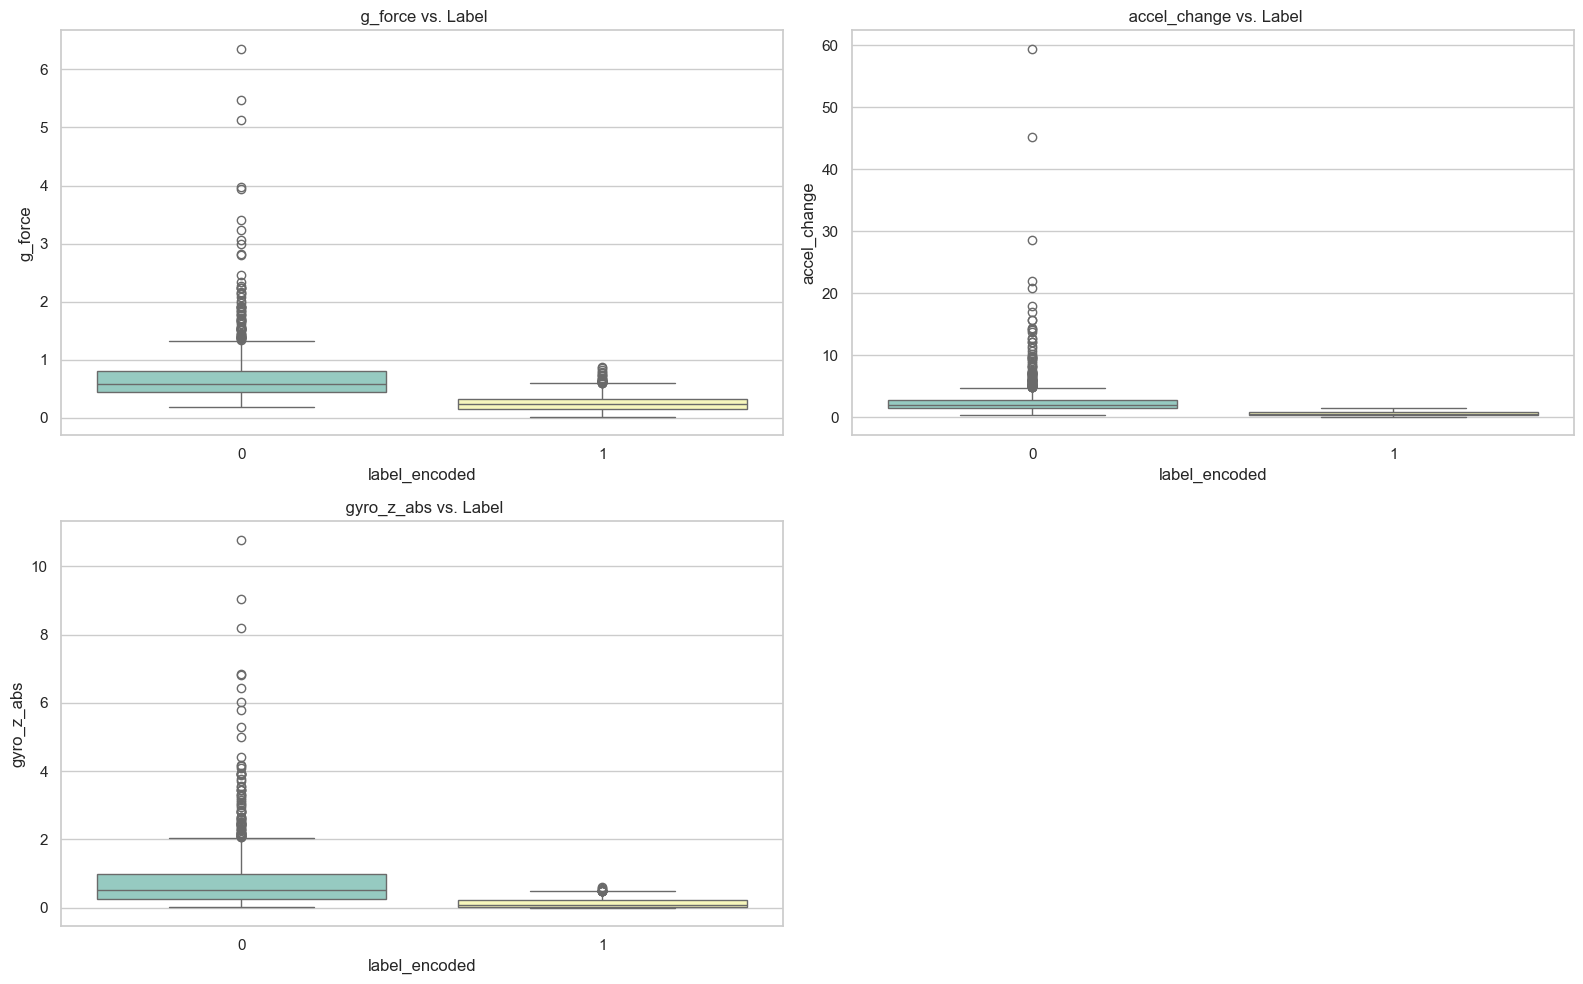

In [71]:
# 3.  Feature Distributions Grouped by Label
features_to_plot = ['g_force', 'accel_change', 'gyro_z_abs']
plt.figure(figsize=(16, 10))

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x='label_encoded', y=feature, palette='Set3')
    plt.title(f" {feature} vs. Label")

plt.tight_layout()
plt.show()

In [73]:
from sklearn.model_selection import train_test_split

# Define feature columns to use
feature_cols = ['g_force', 'accel_change', 'gyro_z_abs', 'road_type_encoded']
X = df[feature_cols]
y = df['label_encoded']

In [75]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [77]:

# Show shapes of resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2366, 4), (592, 4), (2366,), (592,))

In [81]:
from sklearn.ensemble import RandomForestClassifier


In [83]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [87]:
from sklearn.metrics import classification_report, confusion_matrix


In [91]:
# Predict and evaluate
y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['Dangerous', 'Safe'], output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

report

{'Dangerous': {'precision': 0.9854368932038835,
  'recall': 1.0,
  'f1-score': 0.9926650366748166,
  'support': 203.0},
 'Safe': {'precision': 1.0,
  'recall': 0.9922879177377892,
  'f1-score': 0.9961290322580645,
  'support': 389.0},
 'accuracy': 0.9949324324324325,
 'macro avg': {'precision': 0.9927184466019418,
  'recall': 0.9961439588688946,
  'f1-score': 0.9943970344664406,
  'support': 592.0},
 'weighted avg': {'precision': 0.9950062319601155,
  'recall': 0.9949324324324325,
  'f1-score': 0.9949412094482684,
  'support': 592.0}}

In [93]:
conf_matrix

array([[203,   0],
       [  3, 386]], dtype=int64)

In [95]:
from sklearn.metrics import accuracy_score

# Training accuracy
train_predictions = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("✅ Training Accuracy:", round(train_accuracy * 100, 2), "%")

# Testing accuracy
test_predictions = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("✅ Testing Accuracy:", round(test_accuracy * 100, 2), "%")


✅ Training Accuracy: 100.0 %
✅ Testing Accuracy: 99.49 %


In [97]:
print(classification_report(y_test, test_predictions, target_names=['Dangerous', 'Safe']))

              precision    recall  f1-score   support

   Dangerous       0.99      1.00      0.99       203
        Safe       1.00      0.99      1.00       389

    accuracy                           0.99       592
   macro avg       0.99      1.00      0.99       592
weighted avg       1.00      0.99      0.99       592



In [99]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.99662162 1.         0.99831081 0.98477157 1.        ]
Mean accuracy: 0.9959408012072988
